### Preprocessing

In [294]:
# import packages
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols, Logit
from scipy import stats
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:,}'.format
import seaborn as sns
%matplotlib inline

In [295]:
# import data
url = "/Users/arpanganguli/Documents/Professional/Finance/ISLR/Wage.csv"
Wage = pd.read_csv(url, index_col='SlNo')

In [296]:
Wage.head()

,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
SlNo,,,,,,,,,,,
231655,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063334962759,75.0431540173515
86582,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.25527250510331,70.47601964694451
161300,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.8750612633917,130.982177377461
155159,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041392685158231,154.68529299563
11443,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063334962759,75.0431540173515


In [297]:
Wage.describe().round(2)

,year,age,logwage,wage
count,"3,000.0","3,000.0","3,000.0","3,000.0"
mean,"2,005.79",42.41,4.65,111.7
std,2.03,11.54,0.35,41.73
min,"2,003.0",18.0,3.0,20.09
25%,"2,004.0",33.75,4.45,85.38
50%,"2,006.0",42.0,4.65,104.92
75%,"2,008.0",51.0,4.86,128.68
max,"2,009.0",80.0,5.76,318.34


In [298]:
Wage.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 231655 to 453557
Data columns (total 11 columns):
year          3000 non-null int64
age           3000 non-null int64
maritl        3000 non-null object
race          3000 non-null object
education     3000 non-null object
region        3000 non-null object
jobclass      3000 non-null object
health        3000 non-null object
health_ins    3000 non-null object
logwage       3000 non-null float64
wage          3000 non-null float64
dtypes: float64(2), int64(2), object(7)
memory usage: 281.2+ KB


In [299]:
agegrid = np.arange(Wage['age'].min(), Wage['age'].max()).reshape(-1,1)

### Splines

In [300]:
from patsy import dmatrix

**Specifying the knots in a cubic spline**

In [301]:
X1 = dmatrix("bs(AGE, knots=(25, 40, 60), degree=3, include_intercept=False)", {"AGE": Wage['age']}, return_type='dataframe')
y1 = Wage['wage']
df1 = pd.concat([y1, X1], axis=1)

In [302]:
lmfit1 = ols('y1~X1', data=df1).fit()
lmfit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y1   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     47.19
Date:                Wed, 23 Jan 2019   Prob (F-statistic):           1.53e-55
Time:                        18:04:25   Log-Likelihood:                -15314.
No. Observations:                3000   AIC:                         3.064e+04
Df Residuals:                    2993   BIC:                         3.068e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.2469      4.730      6.394      0.000      20.972      39.522
X1[0]         30.2469      4.730      6.394      0.000      20.972      39.522
X1[1]          3.9805     12.538      0.317      0.751     -20.603      28.564
X1[2]         44.6310      9.626      4.636      0.000      25.756      63.506
X1[3]         62.8388     10.755      5.843      0.000      41.750      83.927
X1[4]         55.9908     10.706      5.230      0.000      34.998      76.983
X1[5]         50.6881     14.402      3.520      0.000      22.450      78.927
X1[6]         16.6061     19.126      0.868      0.385     -20.896      54.108
==============================================================================
Omnibus:                     1096.233   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4953.521
Skew:                           1.720   Prob(JB):                         0.00
Kurtosis:                       8.273   Cond. No.                     1.80e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.1e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**Degrees of freedom($df$) = 6**

In [303]:
X2 = dmatrix("bs(AGE, df=6, include_intercept=False)", {"AGE": Wage['age']}, return_type='dataframe')
y2 = Wage['wage']
df2 = pd.concat([y2, X2], axis=1)

In [304]:
lmfit2 = ols('y2~X2', data=df2).fit()
lmfit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y2   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     47.71
Date:                Wed, 23 Jan 2019   Prob (F-statistic):           3.76e-56
Time:                        18:04:26   Log-Likelihood:                -15313.
No. Observations:                3000   AIC:                         3.064e+04
Df Residuals:                    2993   BIC:                         3.068e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     28.1569      3.629      7.759      0.000      21.041      35.273
X2[0]         28.1569      3.629      7.759      0.000      21.041      35.273
X2[1]         27.8240     12.435      2.238      0.025       3.443      52.205
X2[2]         54.0625      7.127      7.585      0.000      40.087      68.038
X2[3]         65.8284      8.323      7.909      0.000      49.508      82.149
X2[4]         55.8127      8.724      6.398      0.000      38.707      72.918
X2[5]         72.1315     13.745      5.248      0.000      45.181      99.082
X2[6]         14.7509     16.209      0.910      0.363     -17.030      46.532
==============================================================================
Omnibus:                     1090.779   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4901.885
Skew:                           1.712   Prob(JB):                         0.00
Kurtosis:                       8.243   Cond. No.                     2.31e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.27e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**Natural spline, $df$=4**

In [305]:
X3 = dmatrix("cr(AGE, df=4)", {"AGE": Wage['age']}, return_type='dataframe')
y3 = Wage['wage']
df3 = pd.concat([y3, X3], axis=1)

In [306]:
lmfit3 = ols('y3~X3', data=df3).fit()
lmfit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y3   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     91.74
Date:                Wed, 23 Jan 2019   Prob (F-statistic):           8.48e-57
Time:                        18:04:27   Log-Likelihood:                -15318.
No. Observations:                3000   AIC:                         3.064e+04
Df Residuals:                    2996   BIC:                         3.067e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     44.2456      0.985     44.918      0.000      42.314      46.177
X3[0]         44.2456      0.985     44.918      0.000      42.314      46.177
X3[1]        -23.5169      3.514     -6.693      0.000     -30.406     -16.628
X3[2]         27.9620      2.113     13.234      0.000      23.819      32.105
X3[3]         27.0858      2.199     12.315      0.000      22.773      31.398
X3[4]         12.7147      6.819      1.865      0.062      -0.655      26.084
==============================================================================
Omnibus:                     1092.887   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4928.836
Skew:                           1.714   Prob(JB):                         0.00
Kurtosis:                       8.261   Cond. No.                     2.88e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.97e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**Comparing relative strengths of predictions of each of the aforementioned methods**

In [307]:
from sklearn.linear_model import LinearRegression
lmfit1_skl = LinearRegression().fit(X1, y1)
lmfit2_skl = LinearRegression().fit(X2, y2)
lmfit3_skl = LinearRegression().fit(X3, y3)

In [308]:
Xpred1 = dmatrix("bs(agegrid, knots=(25,40,60), include_intercept=False)", {"agegrid": agegrid}, return_type='dataframe')
Xpred2 = dmatrix("bs(agegrid, df=6, include_intercept=False)", {"age_grid": agegrid}, return_type='dataframe')
Xpred3 = dmatrix("cr(agegrid, df=4)", {"agegrid": agegrid}, return_type='dataframe')

In [309]:
lmpred1 = lmfit1_skl.predict(Xpred1)
lmpred2 = lmfit2_skl.predict(Xpred2)
lmpred3 = lmfit3_skl.predict(Xpred3)

Text(0.5,1,'spline predictions vs age')

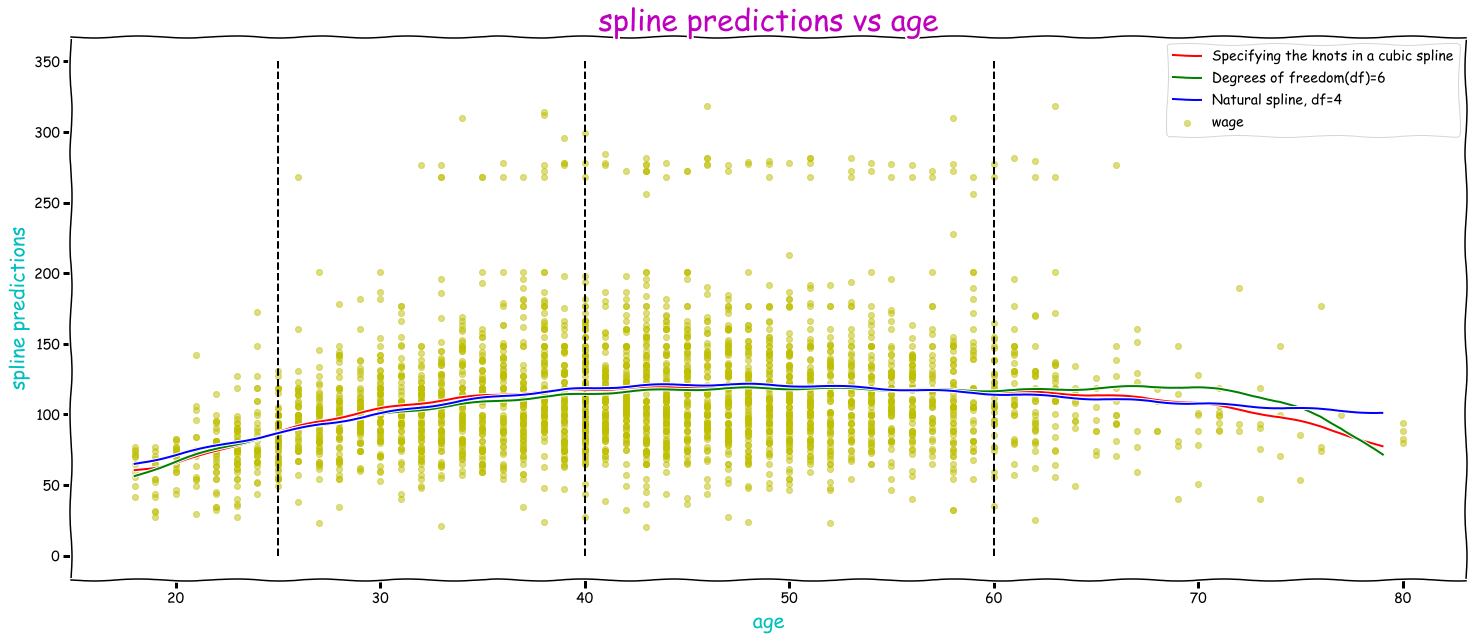

In [310]:
# plotting all predictions
plt.xkcd()
plt.figure(figsize=(25, 10))
plt.scatter(Wage['age'], Wage['wage'], facecolor='y', alpha=0.5)
plt.plot(agegrid, lmpred1, color='r', label='Specifying the knots in a cubic spline')
plt.plot(agegrid, lmpred2, color='g', label='Degrees of freedom(df)=6')
plt.plot(agegrid, lmpred3, color='b', label='Natural spline, df=4')
[plt.vlines(i , 0, 350, linestyles='dashed', lw=2, colors='k') for i in [25,40,60]]
plt.legend()
plt.xlabel('age', fontsize=20, color='c')
plt.ylabel('spline predictions', fontsize=20, color='c')
plt.title('spline predictions vs age', fontsize=30, color='m')

### Local regression

In [311]:
import loess
from statsmodels.nonparametric.smoothers_lowess import lowess

In [312]:
lX = Wage.age
ly = Wage.wage

In [313]:
lsfit02 = lowess(ly, lX, frac=0.2, return_sorted=True)
lsfit02

array([[18.        , 58.4833787 ],
       [18.        , 58.4833787 ],
       [18.        , 58.4833787 ],
       ...,
       [80.        , 83.84164611],
       [80.        , 83.84164611],
       [80.        , 83.84164611]])

Text(0,0.5,'wage')

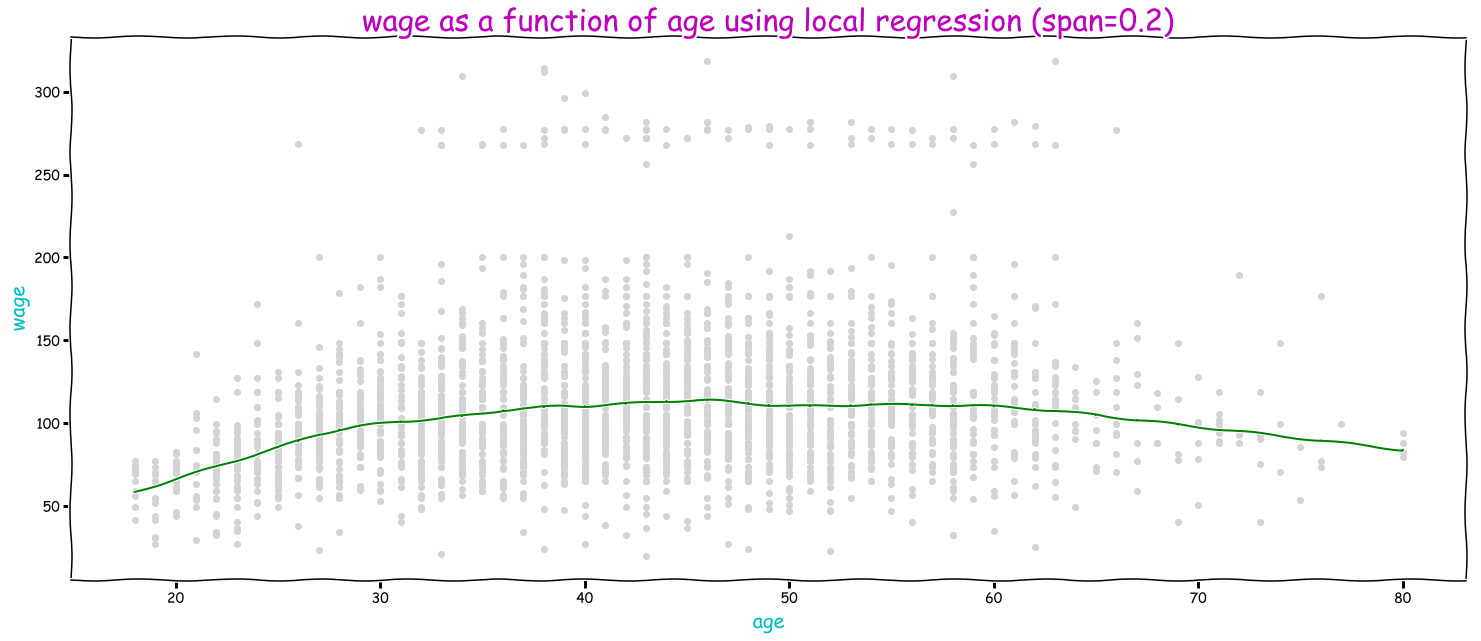

In [314]:
plt.xkcd()
plt.figure(figsize=(25, 10))
plt.scatter(Wage.age, Wage.wage, facecolor='lightgrey')
plt.plot(lsfit02[:3000,0], lsfit02[:3000,1], color='g')
plt.title('wage as a function of age using local regression (span=0.2)', fontsize=30, color='m')
plt.xlabel('age', fontsize=20, color='c')
plt.ylabel('wage', fontsize=20, color='c')

In [315]:
lsfit05 = lowess(ly, lX, frac=0.5)
lsfit05

array([[18.        , 66.16357852],
       [18.        , 66.16357852],
       [18.        , 66.16357852],
       ...,
       [80.        , 93.68232366],
       [80.        , 93.68232366],
       [80.        , 93.68232366]])

Text(0,0.5,'wage')

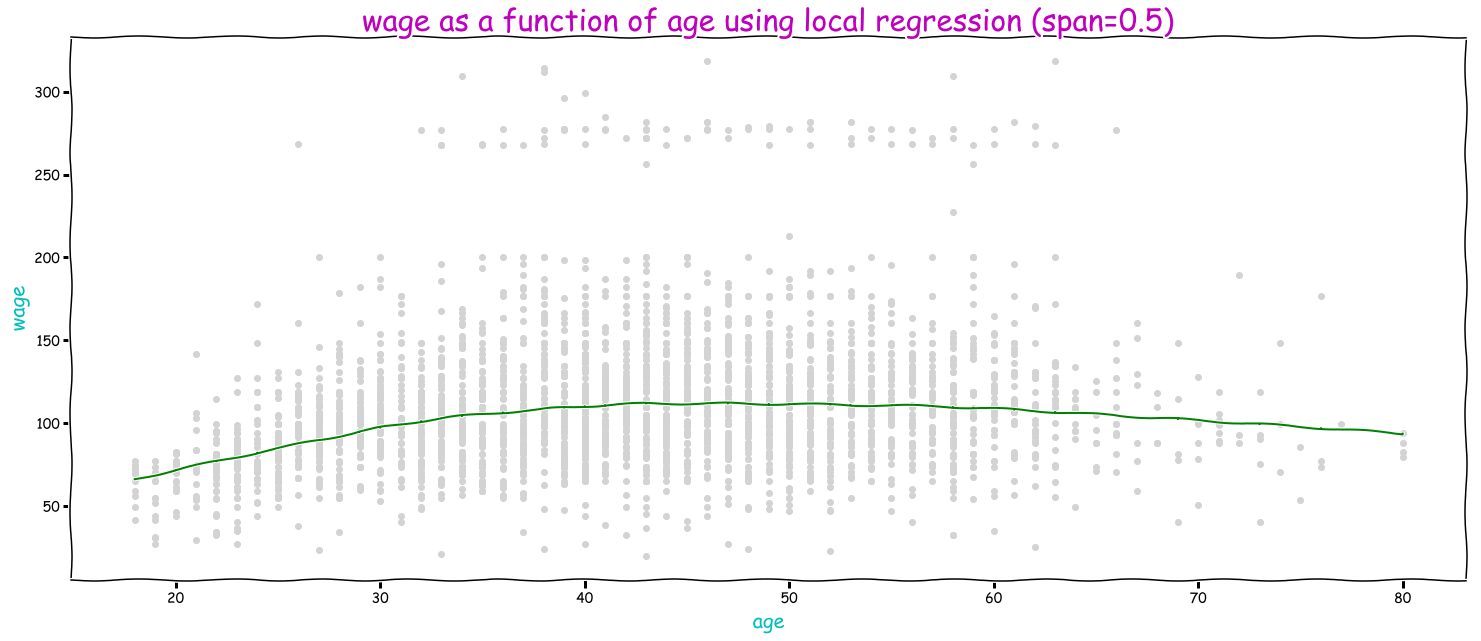

In [316]:
plt.xkcd()
plt.figure(figsize=(25, 10))
plt.scatter(Wage.age, Wage.wage, facecolor='lightgrey')
plt.plot(lsfit05[:3000,0], lsfit05[:3000,1], color='g')
plt.title('wage as a function of age using local regression (span=0.5)', fontsize=30, color='m')
plt.xlabel('age', fontsize=20, color='c')
plt.ylabel('wage', fontsize=20, color='c')

In [317]:
lsfit09 = lowess(ly, lX, frac=0.9)
lsfit09

array([[ 18.        ,  77.50602205],
       [ 18.        ,  77.50602205],
       [ 18.        ,  77.50602205],
       ...,
       [ 80.        , 103.43992868],
       [ 80.        , 103.43992868],
       [ 80.        , 103.43992868]])

Text(0,0.5,'wage')

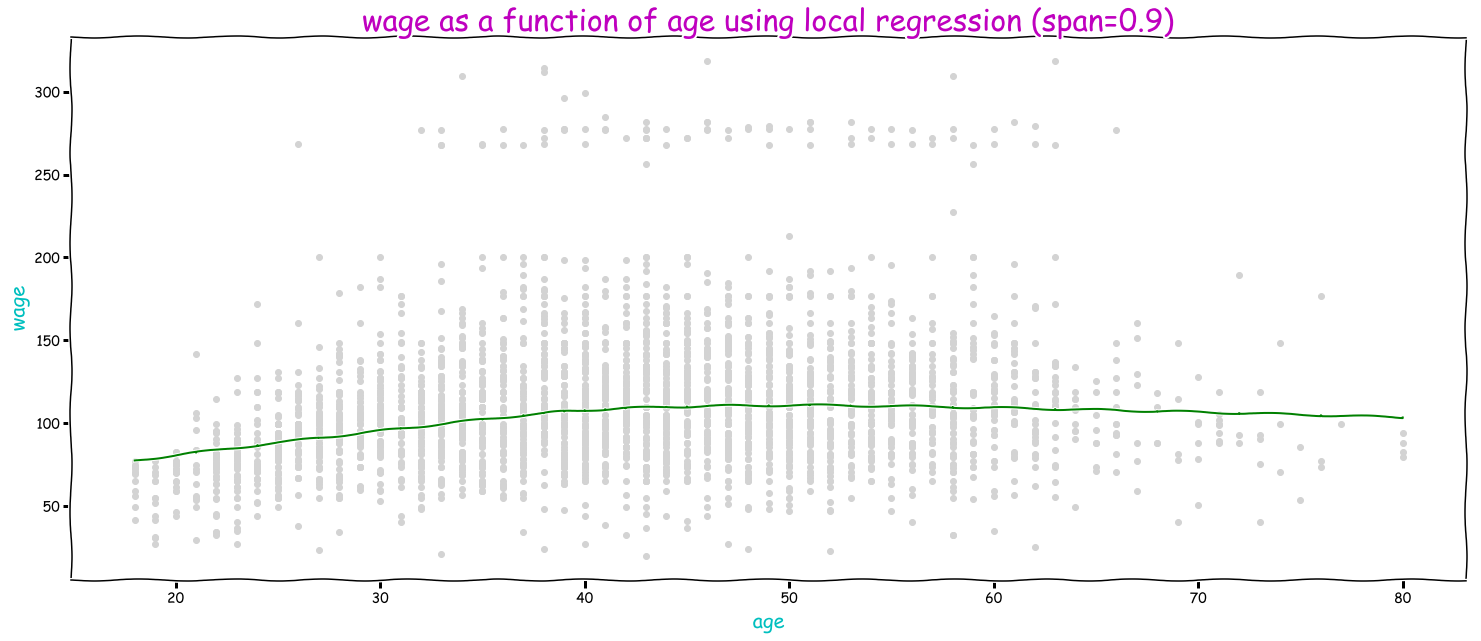

In [318]:
plt.xkcd()
plt.figure(figsize=(25, 10))
plt.scatter(Wage.age, Wage.wage, facecolor='lightgrey')
plt.plot(lsfit09[:3000,0], lsfit09[:3000,1], color='g')
plt.title('wage as a function of age using local regression (span=0.9)', fontsize=30, color='m')
plt.xlabel('age', fontsize=20, color='c')
plt.ylabel('wage', fontsize=20, color='c')

In [319]:
lsfit01 = lowess(ly, lX, frac=0.1)
lsfit01

array([[18.        , 59.35940573],
       [18.        , 59.35940573],
       [18.        , 59.35940573],
       ...,
       [80.        , 82.03266641],
       [80.        , 82.03266641],
       [80.        , 82.03266641]])

Text(0,0.5,'wage')

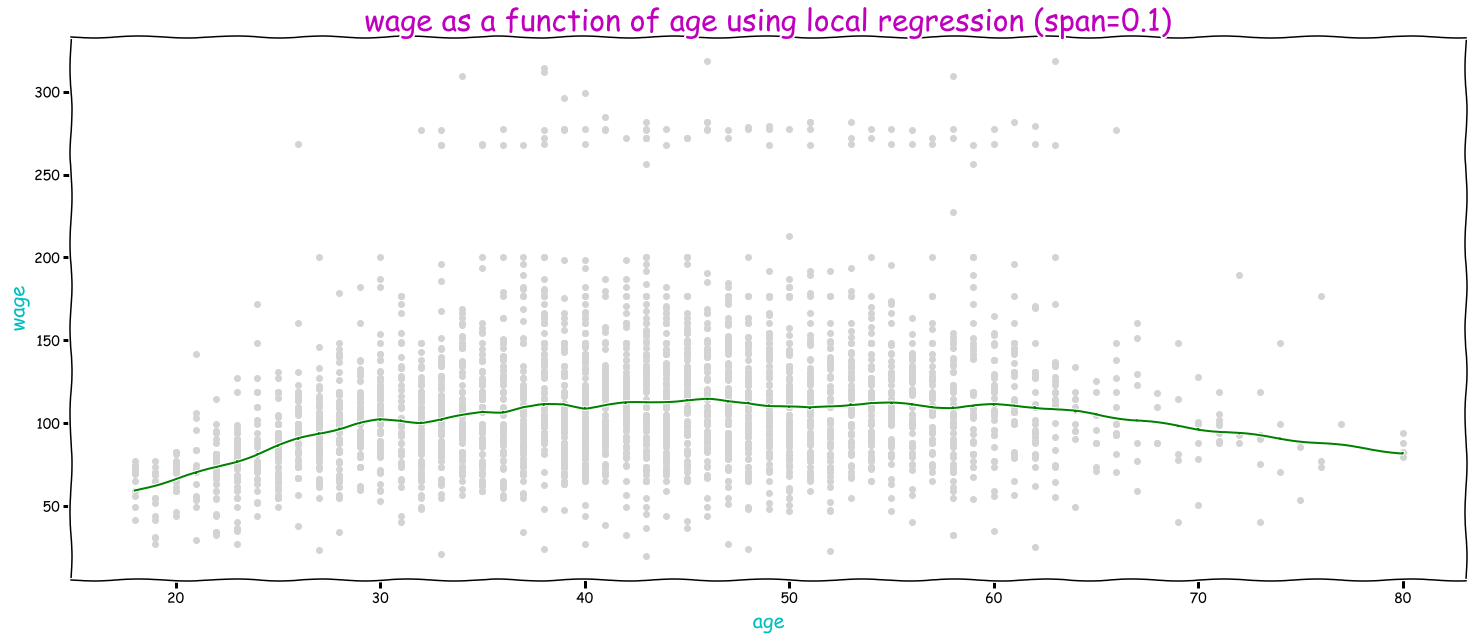

In [320]:
plt.xkcd()
plt.figure(figsize=(25, 10))
plt.scatter(Wage.age, Wage.wage, facecolor='lightgrey')
plt.plot(lsfit01[:3000,0], lsfit01[:3000,1], color='g')
plt.title('wage as a function of age using local regression (span=0.1)', fontsize=30, color='m')
plt.xlabel('age', fontsize=20, color='c')
plt.ylabel('wage', fontsize=20, color='c')

**As we can see, larger the span, smoother the fit.**